<h1>Fragen</h1>
<h2>Helfen Ampeln bei der Reduktion von Abbiege und Kreuzungsunfällen?</h2>
1. Welche Informationen sind notwendig, um diese Frage beantworten zu können? <br/>
Abgrenzung Abbiege und Kreuzungsunfälle?<br/>
Unfalltyp (technisch UTYP1 )<br/>
2 = Abbiegeunfall<br/>
3 = Einbiegen / Kreuzen-Unfall<br/>
NAHE_AMPEL <br/>
0 = False <br/>
1 = True <br/>

2. Woran erkenne ich, ob/in welchem Maß die Ampel geholfen hat? <br/>
Durchschnittliche Anzahl an Unfällen um eine Ampel rum im Vergleich zu Kreuzungen, an denen es keine Ampel gab (Visuelle Erkenntnis) <br/>
Warum keine analytische Erkenntnis? --> Notwendige Daten fehlen, um das vergleichen zu können müsste, aber mithilfe von Clustering könnte eine Gruppenbildung vorgenommen werden<br/>
Verkehrsmenge auf Straßenabschnitten <br/>
Verkehrsmenge auf Straßenabschnitten ggf. Kategorisierung in hohes Verehrsaufkommen, mittleres, niedriges  <br/>
Vergleich von Bezirken Anzahl Ampeln je durchschnittliche Verkehrsmenge <br/>
Tempolimits einbringen <br/>

## 1. Vorbereitung des Datensatzes

### 1.1 Generelles Aufbereiten der Datenbasis

In [66]:
import geopandas as gpd
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
crash_data = gpd.read_file('../01_Source/consolidatedDataSet.geojson') 

In [67]:
crash_data.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,METER,STR_NAME,DTV,HERKUNFT,NAME,KNAME,PLR_NAME,EW2010,VBUS,VBUS_PERS,GESLAERM,GESLAERM_PERS,GEMEINDE,BEZIRK,ANWERT,BRW,NUTZUNG,GFZ,VERFAHRENSART,STICHTAG,BEITRAGSZUSTAND,LUMNUM,ELEM_NR,VRICHT_TXT,WERT_VES,ZEIT_T,TAG_T,DURCH_T,DANN_T,DAT_T,LAT,LON,formatted_address,address_components,postal_code,sublocality,street_number,route,TARGET,UART_Value,UWOCHENTAG_Value,ULICHTVERH_Value,UTYP1_Value,STRZUSTAND_Value,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,UKREIS_AVG_TARGET,UGEMEINDE_AVG_TARGET,CRASH_BY_DTV,FATAL_CRASH_BY_DTV,Indicator,geometry
0,201103,11,0,10,10,2018,5,14,5,5,3,0,0,1,0,1,0,0,0,814741.4342,5.829904e+06,254.0,Lemkestr.,3852.0,"Modellrechnung 2014, VMZ",None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550028_62550029.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.528103,13.640801,"Lemkestr./Greifswalder Str. (Berlin), 12623 Be...","[ { ""long_name"": ""Lemkestr.\/Greifswalder Str....",12623.0,Bezirk Marzahn-Hellersdorf,None,Lemkestr./Greifswalder Str. (Berlin),1,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Donnerstag,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,81.178609,2.777778,10.202492,3.894081,0.415369,1.531672,21.92029,21.92029,121.761,48.704,0.071523,"MULTIPOLYGON (((814751.434 5829903.997, 814750..."
1,199882,11,0,10,10,2018,4,16,6,5,3,0,1,1,0,0,0,0,0,814743.6764,5.829892e+06,254.0,Lemkestr.,3852.0,"Modellrechnung 2014, VMZ",None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550028_62550029.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.527997,13.640823,"Lemkestraße 104, 12623 Berlin, Germany","[ { ""long_name"": ""104"", ""short_name"": ""104"", ""...",12623.0,Bezirk Marzahn-Hellersdorf,104,Lemkestraße,1,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Freitag,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,81.178609,2.777778,10.202492,3.894081,0.415369,1.531672,21.92029,21.92029,121.761,48.704,0.071523,"MULTIPOLYGON (((814753.676 5829892.369, 814753..."
2,204338,11,0,10,10,2018,8,7,6,5,3,0,0,1,0,0,0,0,0,814018.8594,5.828964e+06,67.0,Lemkestr.,2868.0,"Modellrechnung 2014, VMZ",None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],61540047_62540021.01,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.520097,13.629297,"Albrecht-Dürer-Straße 5C, 12623 Berlin, Germany","[ { ""long_name"": ""5C"", ""short_name"": ""5C"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,5C,Albrecht-Dürer-Straße,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Freitag,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,80.613668,2.894003,10.216179,4.184100,0.557880,1.534170,21.92029,21.92029,121.761,48.704,0.071523,"MULTIPOLYGON (((814028.859 5828964.065, 814028..."
3,196865,11,0,10,10,2018,1,18,2,5,3,2,0,1,0,0,0,0,0,814875.2039,5.830058e+06,220.0,Lemkestr.,6108.0,"Modellrechnung 2014, VMZ",None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550001_62550021.01,beide Richtungen,30.0,07:00 - 17:00,Montag bis Freitag,Kinder,Zeitangabe,None,52.529404,13.642912,"Lemkestraße 112B, 12623 Berlin, Germany","[ { ""long_name"": ""112B"", ""short_name"": ""112B"",...",12623.0,Bezirk Marzahn-Hellersdorf,112B,Lemkestraße,0,Zusammensto

In [68]:
affected_crash_data = crash_data[((crash_data['UTYP1'] == 2) | (crash_data['UTYP1'] == 3))]

In [69]:
affected_crash_data.shape

(4972, 77)

In [70]:
# Feld Nahe Ampel erzeugen
affected_crash_data['NAHE_AMPEL'] = 0
affected_crash_data.loc[~affected_crash_data["KNAME"].isna(), ['NAHE_AMPEL']] = 1
affected_crash_data = affected_crash_data.drop(["NAME","KNAME","PLR_NAME"], axis=1)

affected_crash_data.loc[affected_crash_data['NAHE_AMPEL'] == 1].shape

/Users/haju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2729, 75)

### 1.2 Clustering zur Sicherstellung von Vergleichbarkeit (Ab jetzt in QGIS realisiert über DBSCAN)

In [71]:
#str(crash_data.iloc[0, :].geometry[ 0 ].centroid)
# 1. Loope über alle Crash Daten
# 2. Hole den Centroid aus dem 1. Polygon str(crash_data.iloc[0, :].geometry[ 0 ].centroid)
# 3. replace geometry with the point
#df_new = pd.DataFrame(columns = [])
#for index, row in crash_data.iterrows():
#    print(index)
#    row.geometry = row.geometry[ 0 ].centroid 
#    df_new = df_new.append(row, ignore_index=True)

### 1.3 Einlesen, der in QGIS ermittelten Cluster

In [72]:
cluster = pd.read_csv("../01_Source/haeufung.csv",sep=';')
affected_crash_data = pd.merge(affected_crash_data, cluster, left_on=['OBJECTID'], right_on=['OBJECTID'],  how='inner')

In [73]:
affected_crash_data['OBJECTID'].shape

(4972,)

## 2 Betrachtung der Daten

In [74]:
crashes_near_traffic_light = affected_crash_data[ affected_crash_data['NAHE_AMPEL'] == 1 ]
crashes_near_traffic_light['OBJECTID'].shape

(2729,)

In [75]:
crashes_without_traffic_light = affected_crash_data[affected_crash_data['NAHE_AMPEL'] == 0]
crashes_without_traffic_light['OBJECTID'].shape

(2243,)

In [76]:
#Durchschnittliche Anzahl an Unfällen um eine Ampel rum im Vergleich zu Kreuzungen
cnt_crtl = crashes_near_traffic_light.groupby('CLUSTER_ID')[['OBJECTID']].count()
cnt_crtl.rename(columns=lambda x: 'Cnt' + x, inplace=True)
cnt_crtl['CntOBJECTID'].mean()

2.1693163751987283

In [77]:
cnt_cwtl = crashes_without_traffic_light.groupby('CLUSTER_ID')[['OBJECTID']].count()
cnt_cwtl.rename(columns=lambda x: 'Cnt' + x, inplace=True)
cnt_cwtl['CntOBJECTID'].mean()

1.406269592476489

In einer einfachen Betrachtung scheint es zunächst so, dass eine Ampel mehr Abbiege- und Kreuzungsunfälle verursacht.

Die Verteilung der Anzahl von Unfällen scheint an dieser Stelle noch nicht geeignet, um zu prüfen, ob Ampeln bei der Reduktion von Unfällen helfen, da es auch seien könnte, dass es einfach viele Kreuzungen ohne Ampel gibt, die aufgrund diverser Features nicht so anfällig für Verkehrsunfälle sind.<br>

Zunächst ist zu beantworten: Welche Features machen einen Ort/Spot besonders gefährlich/prädestiniert für Unfälle und wie könnte dies in Form eines Indizes abgebildet werden: <br>

1. Wie finde ich das heraus?<br>
Als vereinfachte Kennzahl wird im Folgenden das Feature indicator verwendet, welches eine relative Berechnung 
der Anzahl an Unfällen je Verkehrsmenge je Meter darstellt.




In [78]:
#Durchschnittliche Anzahl an Unfällen um eine Ampel rum im Vergleich zu Kreuzungen
cnt_crtl = crashes_near_traffic_light.groupby('CLUSTER_ID')[['Indicator']].sum()
cnt_crtl.rename(columns=lambda x: 'Sum' + x, inplace=True)
cnt_crtl['SumIndicator'].mean()

0.2579648054654653

In [79]:
cnt_cwtl = crashes_without_traffic_light.groupby('CLUSTER_ID')[['Indicator']].sum()
cnt_cwtl.rename(columns=lambda x: 'Sum' + x, inplace=True)
cnt_cwtl['SumIndicator'].mean()

0.14892928634644262

Es scheint als würde das Bestehen von Ampel 

In [80]:
#Wo könnten ggf. Korrelationen existieren?
affected_crash_data_cnt = affected_crash_data.groupby('CLUSTER_ID')[['OBJECTID']].count()
affected_crash_data_cnt.rename(columns=lambda x: 'Cnt' + x, inplace=True)
affected_crash_data = pd.merge(affected_crash_data, affected_crash_data_cnt, left_on=['CLUSTER_ID'], right_on=['CLUSTER_ID'],  how='inner')
corr_matrix = affected_crash_data.corr()


,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,METER,DTV,EW2010,GFZ,WERT_VES,LAT,LON,postal_code,TARGET,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,UKREIS_AVG_TARGET,UGEMEINDE_AVG_TARGET,CRASH_BY_DTV,FATAL_CRASH_BY_DTV,Indicator,NAHE_AMPEL,CLUSTER_ID,CntOBJECTID
OBJECTID,1.000000,NaN,NaN,0.008508,0.008508,NaN,0.118807,0.011571,0.001574,0.010519,0.018091,0.014993,-0.027145,0.024458,0.008167,0.012509,-0.034772,-0.005327,0.006289,-0.011339,-0.045034,-0.020624,-0.282402,-0.057411,-0.030406,-0.163820,-0.043770,-0.013640,0.045651,-0.018038,-0.068621,-0.055061,-0.009068,0.078394,0.051610,0.002877,0.012239,0.012239,0.016903,0.015182,0.020924,-0.054539,-0.066993,-0.106996
ULAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UREGBEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKREIS,0.008508,NaN,NaN,1.000000,1.000000,NaN,-0.004635,-0.021313,0.029035,-0.011794,0.041755,-0.035877,-0.116049,0.050555,0.016698,0.004264,0.008681,0.026063,0.008021,0.266769,-0.065264,0.048387,-0.077142,0.053638,-0.545209,0.029945,-0.085365,0.264277,0.379411,0.049720,-0.015866,0.072036,0.019623,0.065962,-0.192009,-0.273878,0.705018,0.705018,-0.056468,-0.035078,-0.068359,-0.129359,-0.140546,-0.216971
UGEMEINDE,0.008508,NaN,NaN,1.000000,1.000000,NaN,-0.004635,-0.021313,0.029035,-0.011794,0.041755,-0.035877,-0.116049,0.050555,0.016698,0.004264,0.008681,0.026063,0.008021,0.266769,-0.065264,0.048387,-0.077142,0.053638,-0.545209,0.029945,-0.085365,0.264277,0.379411,0.049720,-0.015866,0.072036,0.019623,0.065962,-0.192009,-0.273878,0.705018,0.705018,-0.056468,-0.035078,-0.068359,-0.129359,-0.140546,-0.216971
UJAHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UTYP1,0.018091,NaN,NaN,0.041755,0.041755,NaN,0.004848,-0.030924,-0.010340,0.106197,1.000000,0.002400,0.042041,0.026761,-0.222614,0.018656,-0.038043,-0.019824,0.010646,0.085202,0.002038,-0.005483,-0.082625,0.019874,-0.074392,-0.050758,-0.004544,0.085606,0.020034,0.034227,0.000698,-0.003425,-0.016015,0.017927,0.032900,-0.031393,0.038756,0.038756,0.026778,0.027043,0.030310,-0.320395,-0.082840,-0.134368
DTV,-0.282402,NaN,NaN,-0.077142,-0.077142,NaN,0.016027,-0.000491,-0.006990,-0.015942,-0.082625,0.010176,0.006407,-0.052206,-0.011851,-0.001595,0.037292,0.038455,-0.019518,-0.070551,-0.014412,0.037405,1.000000,-0.002496,0.146097,0.214077,-0.008761,-0.071468,-0.111236,0.005140,0.226309,0.134363,0.018243,-0.183087,-0.198875,-0.178523,-0.062974,-0.062974,-0.060761,-0.059272,-0.083296,0.180351,0.123779,0.185600
GFZ,-0.030406,NaN,NaN,-0.545209,-0.545209,NaN,0.016417,0.047745,-0.006514,-0.015170,-0.074392,0.036533,0.108686,-0.085110,0.002340,-0.022182,0.043901,0.021525,-0.021598,-0.079203,0.076840,-0.090928,0.146097,-0.077264,1.000000,0.059993,0.082633,-0.075570,-0.584840,-0.062923,-0.061141,-0.061179,0.025159,-0.062255,0.308091,0.401640,-0.563752,-0.563752,0.098530,0.070737,0.116654,0.164287,0.108940,0.201812
WERT_VES,-0.163820,NaN,NaN,0.029945,0.029945,NaN,-0.008126,0.003433,0.004221,-0.028475,-0.050758,0.016334,-0.038640,-0.028255,0.000644,0.003144,0.060636,0.006627,-0.012078,-0.004813,0.008437,0.133568,0.214077,-0.080103,0.059993,1.000000,0.008710,-0.004389,0.040481,0.013184,0.005174,0.199491,0.006800,-0.049059,-0.049302,-0.131313,0.052079,0.052079,-0.030828,-0.024848,-0.053732,0.102261,0.587487,0.160238


In [81]:
corr_matrix[~corr_matrix["CntOBJECTID"].between(-0.1,0.1) ]["CntOBJECTID"]

OBJECTID               -0.106996
ULAND                        NaN
UREGBEZ                      NaN
UKREIS                 -0.216971
UGEMEINDE              -0.216971
UJAHR                        NaN
UTYP1                  -0.134368
DTV                     0.185600
GFZ                     0.201812
WERT_VES                0.160238
postal_code            -0.190949
UKREIS_AVG_TARGET      -0.231046
UGEMEINDE_AVG_TARGET   -0.231046
NAHE_AMPEL              0.298146
CLUSTER_ID              0.136172
CntOBJECTID             1.000000
Name: CntOBJECTID, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fec9710>,
      dtype=object)

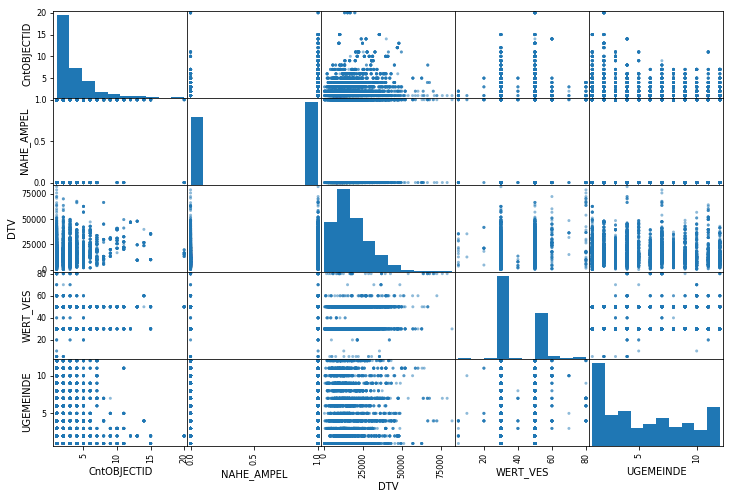

In [82]:
from pandas.plotting import scatter_matrix
attributes = ["CntOBJECTID", "NAHE_AMPEL", "DTV","WERT_VES","UGEMEINDE"]
scatter_matrix(affected_crash_data[attributes], figsize=(12,8))

In [20]:
# Macht es eventuell Sinn Orte an denen es nur einen Unfall gab rauszuwerfen
cnt_crtl['CntOBJECTID'].value_counts()

1     681
2     280
3     136
4      83
5      56
6      37
7      20
8       9
9       8
11      4
10      4
13      2
12      2
17      1
16      1
15      1
Name: CntOBJECTID, dtype: int64

In [21]:
cnt_cwtl['CntOBJECTID'].value_counts()

1     1817
2      337
3       88
4       47
5       24
6       14
11       2
7        2
9        1
14       1
8        1
Name: CntOBJECTID, dtype: int64

In [1]:
#Einbeziehung weiterer Parameter
#Verkehrsmenge auf Straßenabschnitten <br/>
#Verkehrsmenge auf Straßenabschnitten ggf. Kategorisierung in hohes Verehrsaufkommen, mittleres, niedriges  <br/>
#Vergleich von Bezirken Anzahl Ampeln je durchschnittliche Verkehrsmenge <br/>
#Tempolimits einbringen <br/>

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x=affected_crash_data["DTV"], y=affected_crash_data["CntOBJECTID"], c=affected_crash_data["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()

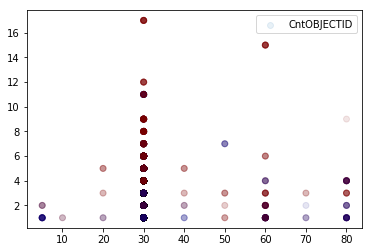

In [29]:
plt.scatter(x=affected_crash_data["WERT_VES"], y=affected_crash_data["CntOBJECTID"], c=affected_crash_data["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()


In [30]:
affected_crash_data_reduced = affected_crash_data[affected_crash_data['CntOBJECTID'] >= 2]
affected_crash_data_reduced['OBJECTID'].shape

(3700,)

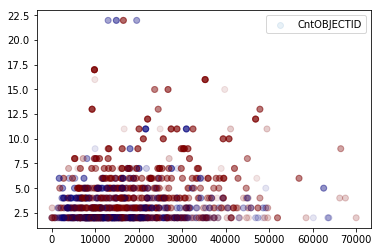

In [63]:
plt.scatter(x=affected_crash_data_reduced["DTV"], y=affected_crash_data_reduced["CntOBJECTID"], c=affected_crash_data_reduced["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()

In [20]:
affected_crash_data["DTV"].describe()

count     5362.000000
mean     17699.612272
std      11301.854668
min          0.000000
25%       9360.000000
50%      15300.000000
75%      24007.500000
max      82082.000000
Name: DTV, dtype: float64

In [24]:
affected_crash_data['DTV_GROUP'] = np.where(affected_crash_data['DTV'] < 9360, 1, np.where(affected_crash_data['DTV'] < 15300, 2, np.where(affected_crash_data['DTV'] < 24007, 3, np.where(affected_crash_data['DTV'] < 82082, 4, 5))))

In [26]:
affected_crash_data['DTV_GROUP'].value_counts()

3    1344
2    1341
4    1340
1    1336
5     802
Name: DTV_GROUP, dtype: int64

In [ ]:
affected_crash_data.to_file("../01_Source/frage1_tableau.geojson")